In [179]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid")

## Figures and Subplots

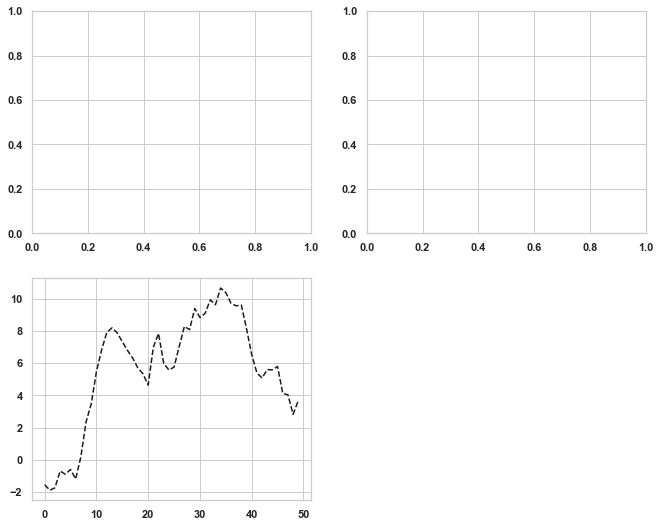

In [180]:
fig = plt.figure(figsize = (11,9))
ax1 = fig.add_subplot(2,2,1)                 # fig.add_subplot(rows,cols, index)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

#When you issue a plotting command like plt.plot(), matplotlib
#draws on the last figure and subplot used (creating one if necessary), thus hiding
#the figure and subplot creation.

plt.plot(np.random.randn(50).cumsum(), 'k--')

# ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
# ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

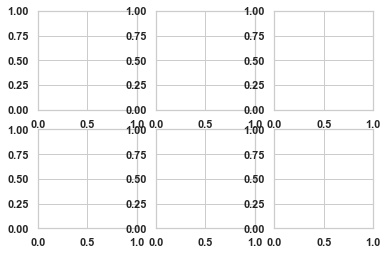

In [181]:
fig, axes = plt.subplots(2, 3)                    # plt.subplots()

In [182]:
axes

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

#### pyplot.subplots options: Python for Data Analysis, page 258

In [183]:
# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)              !!!

wspace and hspace controls the percent of the figure width and figure height, respectively,
to use as spacing between subplots

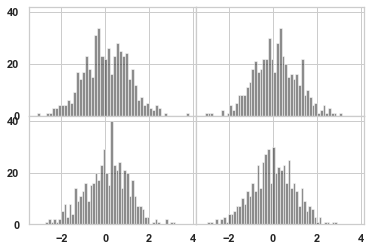

In [184]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

## Colors, Markers, and Line Styles

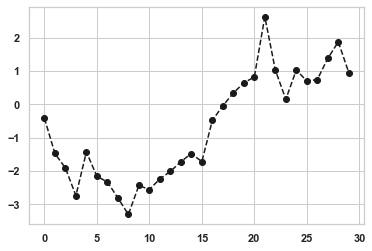

In [185]:
from numpy.random import randn
plt.plot(randn(30).cumsum(), 'ko--')           
# k: color, o: marker, --: linestyle

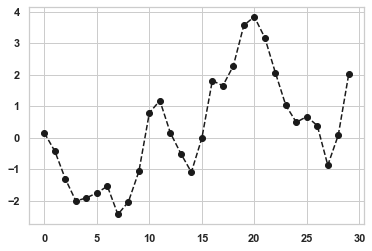

In [186]:
plt.plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

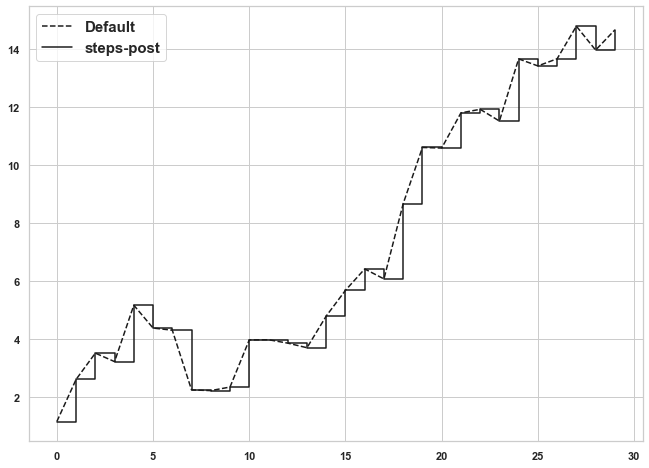

In [187]:
fig = plt.figure(figsize=(11,8))
data = np.random.randn(30).cumsum()
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best', fontsize = 15)

## Ticks, Labels, and Legends

### Setting the title, axis labels, ticks, and ticklabels

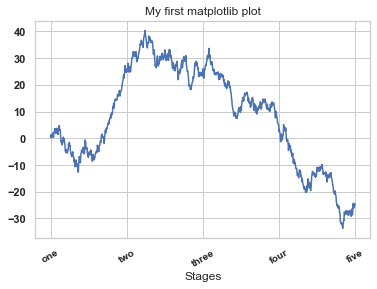

In [188]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

_ = ax.set_xticks([0, 250, 500, 750, 1000])
_ = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
rotation=30, fontsize='small')
_ = ax.set_title('My first matplotlib plot')
_ = ax.set_xlabel('Stages')

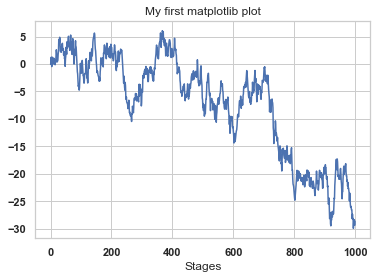

In [189]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

props = {
'title': 'My first matplotlib plot',
'xlabel': 'Stages'
}
_ = ax.set(**props)                        # ax.set(**...)

### Legends

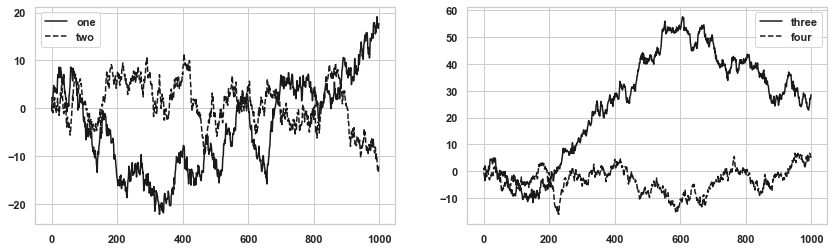

In [190]:
fig = plt.figure(figsize=(11,4))
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(randn(1000).cumsum(),'k', label='one')
ax1.plot(randn(1000).cumsum(), 'k--', label='two')
ax1.legend(loc='best')

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(randn(1000).cumsum(),'k', label='three')
ax2.plot(randn(1000).cumsum(), 'k--', label='four')
ax2.legend(loc='best')
plt.subplots_adjust(wspace=0.2, hspace=0, left=0,right=1)

## Annotations and Drawing on a Subplot

Text(0.5, 0, '')

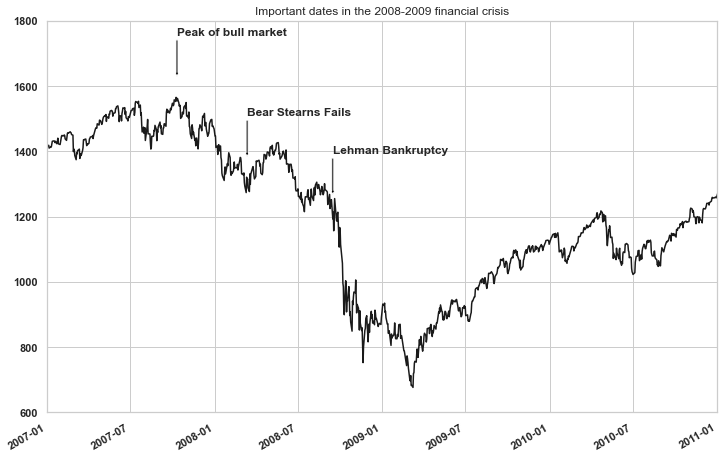

In [191]:
# ax.text(), ax.annotate() e.t.c.
from datetime import datetime

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1, 1, 1)
data = pd.read_csv('examples/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']
spx.plot(ax=ax, style = 'k-')
crisis_data = [
(datetime(2007, 10, 11), 'Peak of bull market'),
(datetime(2008, 3, 12), 'Bear Stearns Fails'),
(datetime(2008, 9, 15), 'Lehman Bankruptcy')
]
for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date)+75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='black', headwidth=4, width=2,
                headlength=4),
                horizontalalignment='left', verticalalignment='top')
# Zoom in on 2007-2010
ax.set_xlim(['2007/1/1', '2011/1/1'])
ax.set_ylim([600, 1800])
ax.set_title('Important dates in the 2008-2009 financial crisis')
ax.set_xlabel(None)

In [192]:
# clarification
data

,SPX
Date,
1990-02-01,328.79
1990-02-02,330.92
1990-02-05,331.85
1990-02-06,329.66
1990-02-07,333.75
...,...
2011-10-10,1194.89
2011-10-11,1195.54
2011-10-12,1207.25


In [193]:
spx

Date
1990-02-01     328.79
1990-02-02     330.92
1990-02-05     331.85
1990-02-06     329.66
1990-02-07     333.75
               ...   
2011-10-10    1194.89
2011-10-11    1195.54
2011-10-12    1207.25
2011-10-13    1203.66
2011-10-14    1224.58
Name: SPX, Length: 5472, dtype: float64

In [194]:
date = datetime(2007, 10, 11)

In [195]:
spx.asof(date)

1554.41

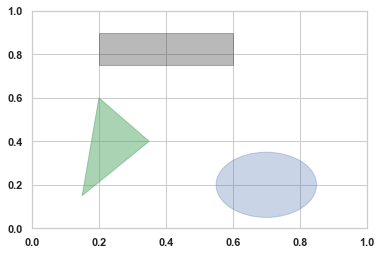

In [196]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
color='g', alpha=0.5)
ax.add_patch(rect)                                         # ax.add_patch()
ax.add_patch(circ)
ax.add_patch(pgon)

## Saving plots to file

#### Figure.savefig options: Python for Data Analysis, page 268

## matplotlib Configuration(rc method)

In [197]:
plt.rc('figure', figsize=(12, 8)) #sets the global default figure size to be 10 × 10

In [198]:
font_options = {'family' : 'monospace',
                'weight' : 'bold',}
plt.rc('font', **font_options)

#### Python for Data Analysis, page 268

# Plotting with pandas and seaborn

## Line plots

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

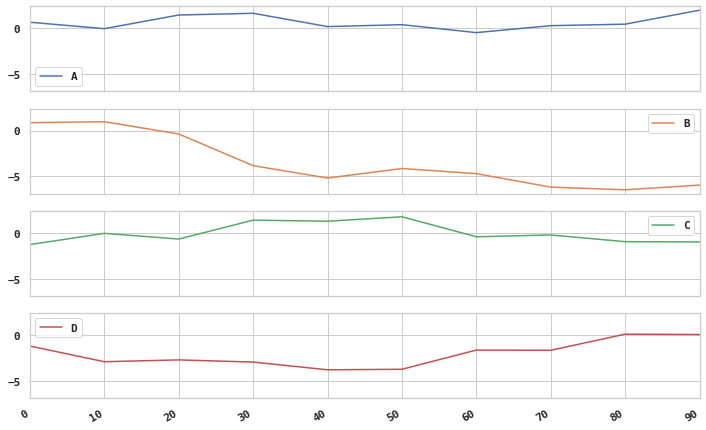

In [199]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10)) 
df.plot(xlim = [0,90], subplots=True, sharey=True)                       # df.plot()

#### Series.plot and df.plot method arguments: Python for Data Analysis, page 271

## Bar plots

In [200]:
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df

Genus,A,B,C,D
one,0.257444,0.060771,0.344616,0.415945
two,0.855611,0.854444,0.121881,0.524921
three,0.504488,0.775935,0.575347,0.161761
four,0.572095,0.942168,0.196691,0.673123
five,0.858100,0.555534,0.400222,0.371925
six,0.941431,0.068373,0.816854,0.826160


<AxesSubplot:>

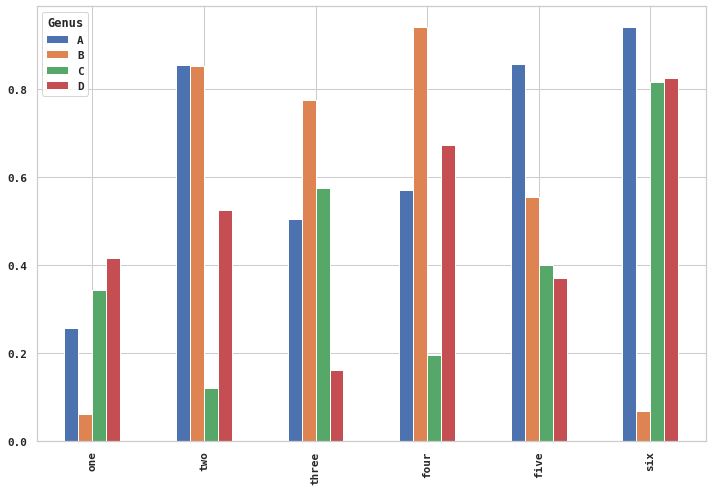

In [201]:
df.plot.bar()

In [202]:
tips = pd.read_csv('examples/tips.csv')
tips

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [203]:
party_counts = pd.crosstab(tips['day'], tips['size'])   # pd.crosstab()
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [204]:
party_counts = party_counts.loc[:, 2:5]
party_counts

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


In [205]:
party_pcts = party_counts.div(party_counts.sum(1), axis=0)         # df.div()
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


In [206]:
party_counts.sum(1)

day
Fri     18
Sat     85
Sun     75
Thur    58
dtype: int64

<AxesSubplot:xlabel='day'>

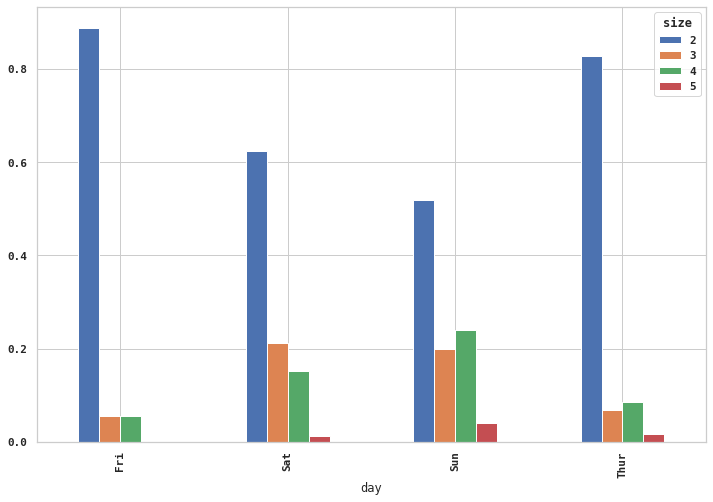

In [207]:
party_pcts.plot.bar()

In [208]:
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


<AxesSubplot:xlabel='tip_pct', ylabel='day'>

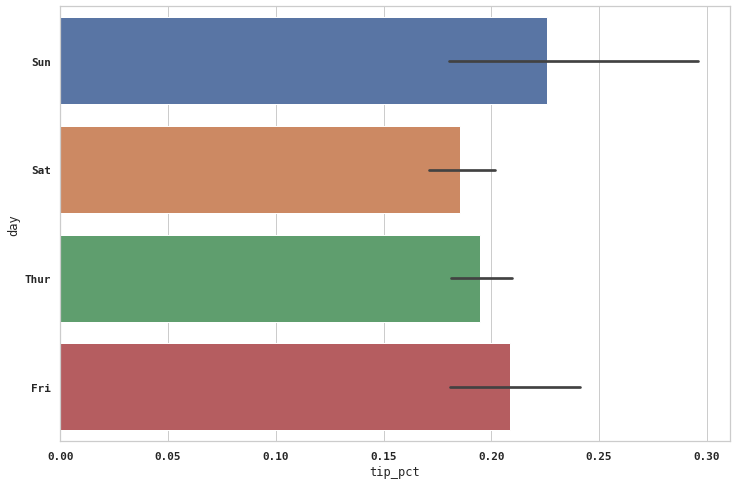

In [209]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')       # sns.barplot()

Plotting functions in seaborn take a data argument, which can be a pandas Data‐
Frame. The other arguments refer to column names. Because there are multiple
observations for each value in the day, the bars are the average value of tip_pct. The
black lines drawn on the bars represent the 95% confidence interval (this can be configured
through optional arguments)

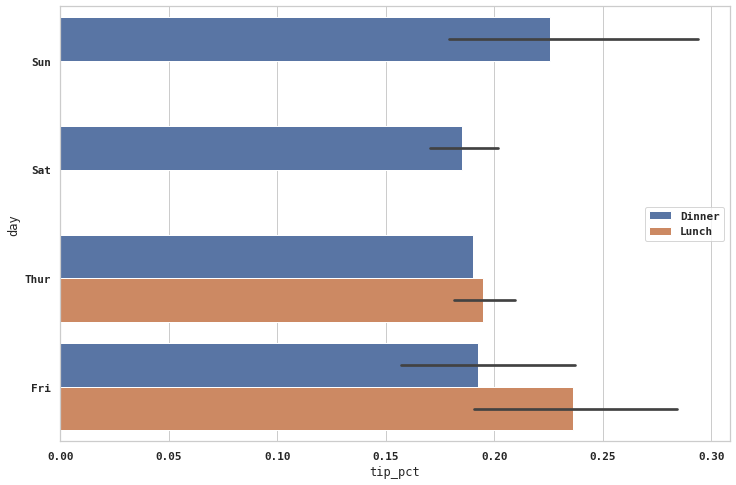

In [210]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')
plt.legend(loc='center right')

## Histograms and density plots

<AxesSubplot:ylabel='Frequency'>

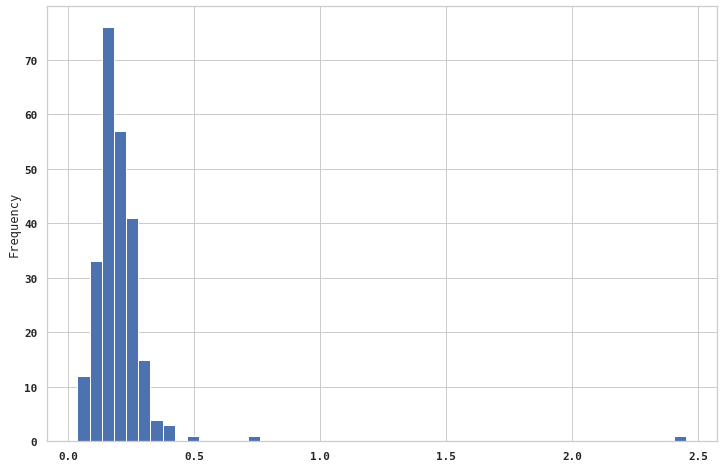

In [212]:
tips['tip_pct'].plot.hist(bins=50)

<AxesSubplot:ylabel='Density'>

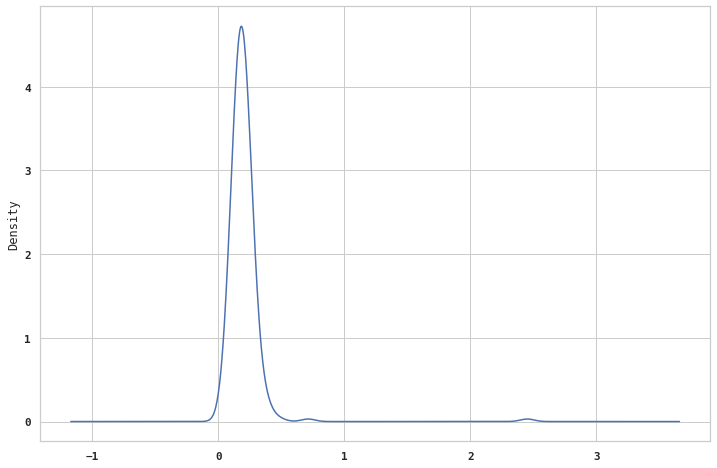

In [213]:
tips['tip_pct'].plot.density()

<AxesSubplot:>

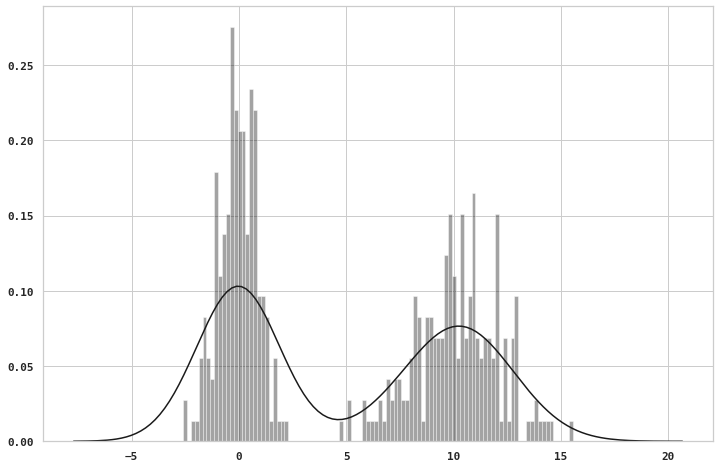

In [215]:
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.distplot(values, bins=100, color='k')               # sns.distplot()

## Scatter or Point Plots

In [218]:
#we load the macrodata dataset, select a few variables, then compute log differences
macro = pd.read_csv('examples/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


Text(0.5, 1.0, 'Changes in log m1 versus log unemp')

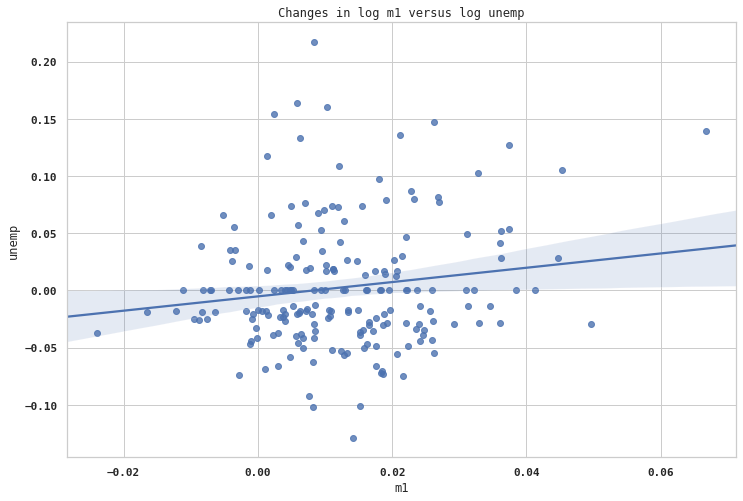

In [220]:
sns.regplot('m1', 'unemp', data=trans_data)                    # sns.regplot()
plt.title('Changes in log %s versus log %s' % ('m1', 'unemp'))

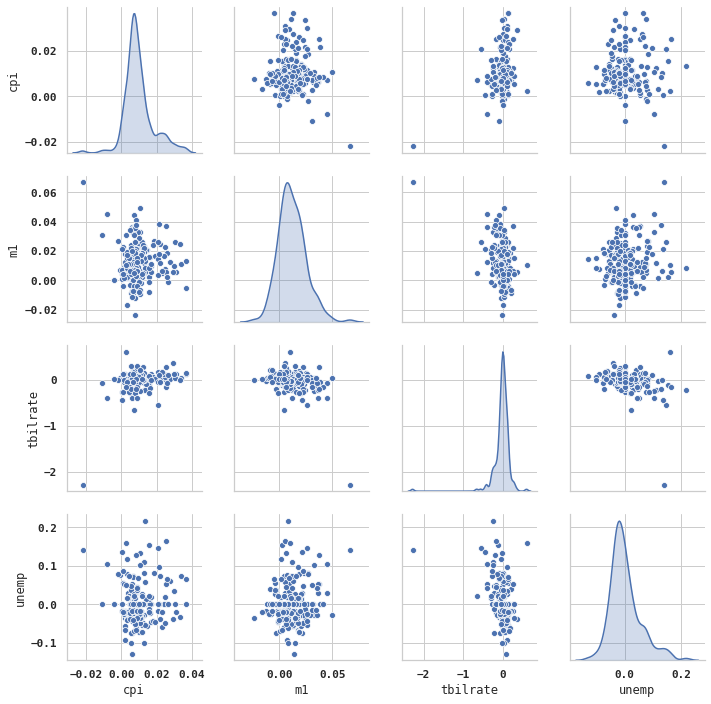

In [223]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 1})

plot_kws argument enables to pass down configuration 
options to the individual plotting calls on the off-diagonal elements

## Facet Grids and Categorical Data

C:\Users\kuryz\miniconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


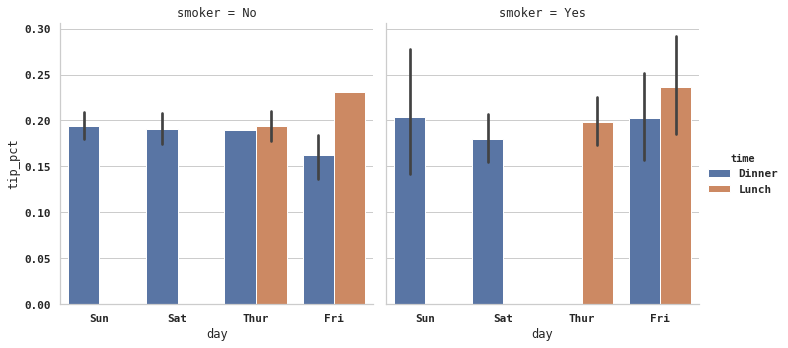

In [230]:
sns.factorplot(x='day', y='tip_pct', hue='time', col='smoker',        #sns.catplot()
               kind='bar', data=tips[tips.tip_pct < 1])

C:\Users\kuryz\miniconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


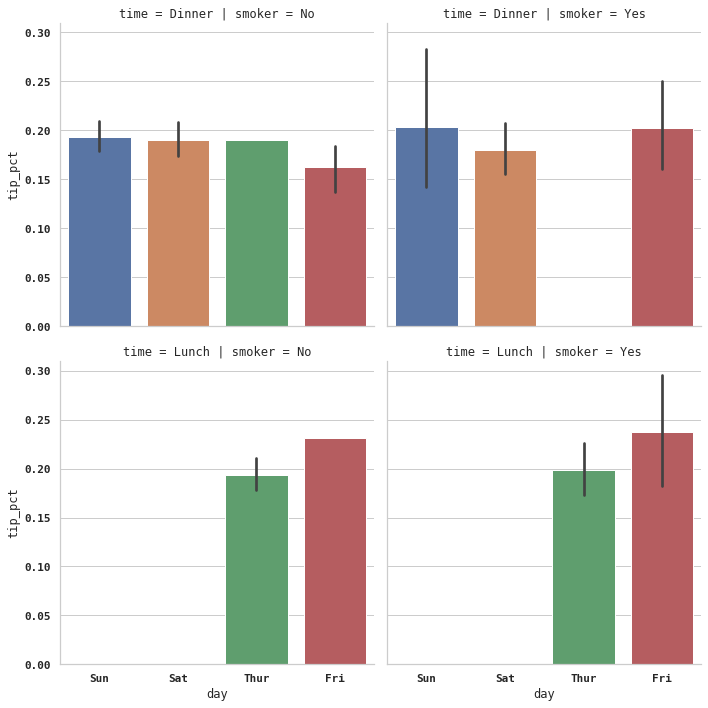

In [231]:
sns.factorplot(x='day', y='tip_pct', row='time',
               col='smoker', kind='bar', data=tips[tips.tip_pct < 1])

C:\Users\kuryz\miniconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


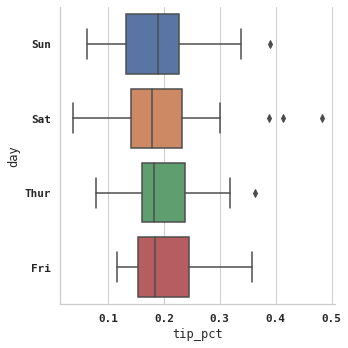

In [232]:
sns.factorplot(x='tip_pct', y='day', kind='box', data=tips[tips.tip_pct < 0.5])